<a href="https://colab.research.google.com/github/shaharec/NLP_BraveTogether/blob/main/NewModel/Text_classification_with_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/Brave-Together/NLP_HolocaustDenial.git"

fatal: destination path 'NLP_HolocaustDenial' already exists and is not an empty directory.


In [ ]:
# import libraries
import pandas as pd
import tensorflow as tf

#Data frame 
- class - 1 for holocaust denial
- class - 0 - None holocaust denial 

In [ ]:
df_labeld_data = pd.read_excel("/content/NLP_HolocaustDenial/NewModel/classified data.xlsx");
df_labeld_data.info

<bound method DataFrame.info of                                                    Data  ... Label.1
0     Believe it or not, many people are so fearful ...  ...   Fake 
1     Whoever it was who said history repeats itself...  ...   Fake 
2     Another crucial thing to question is why denie...  ...   Fake 
3     It’s also worth pointing out that Israel is no...  ...   Fake 
4     However, the above statistics are either under...  ...   Fake 
...                                                 ...  ...     ...
2520                                                NaN  ...    Fake
2521                                                NaN  ...    Fake
2522                                                NaN  ...    Fake
2523                                                NaN  ...    Fake
2524                                                NaN  ...    Fake

[2525 rows x 6 columns]>

In [ ]:

df_real = pd.concat([df_labeld_data.Data,df_labeld_data.Label],axis=1).dropna()
df_fake = pd.concat([df_labeld_data["Data.1"],df_labeld_data["Label.1"]],axis=1).dropna()
# fix columns names
df_fake = df_fake.rename(columns = {"Data.1":"Data","Label.1":"Label"})
#create new df
df = pd.concat([df_fake,df_real],axis = 0)
#remove null values
df = df.dropna()
# change to binary
df.Label = df.Label.replace({"Fake " : 1,"Real" : 0})
df

,Data,Label
0,"My brothers, Hitler was good, it was the Musli...",1
1,People should be allowed to critique the offic...,1
2,There is a lot of things wrong with the whole ...,1
3,#holohoax is one of the main things keeping je...,1
4,Soviet Russia lied about this until 1990.It is...,1
...,...,...
2224,While important for students to know that Brit...,0
2225,Only 6.7% chose the most appropriate answer: t...,0
2226,When asked â€˜what happened when the British g...,0
2227,Another site to explore to learn more about Be...,0


In [ ]:
df[df['Label']==1]

,Data,Label
0,"My brothers, Hitler was good, it was the Musli...",1
1,People should be allowed to critique the offic...,1
2,There is a lot of things wrong with the whole ...,1
3,#holohoax is one of the main things keeping je...,1
4,Soviet Russia lied about this until 1990.It is...,1
...,...,...
1348,#AmericaFirst #FireKusher #IStandWithAssad #bu...,1
1349,#AmericaFirst #FireKusher #IStandWithAssad #bu...,1
1350,#AmericaFirst #FireKusher #IStandWithAssad #bu...,1
1351,#AmericaFirst #FireKusher #IStandWithAssad #bu...,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']
nltk.download("wordnet")
nltk.download("stopwords") 

import matplotlib.pyplot as plt


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words] # if word not in stopwords]

In [ ]:
fake_words = basic_clean(''.join(str(df_fake['Data'].tolist())))
real_words = basic_clean(''.join(str(df_real['Data'].tolist())))
stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
stopwords

In [ ]:
(pd.Series(nltk.ngrams(fake_words, 2)).value_counts())[:50]

Text(0.5, 0, '# of Occurences')

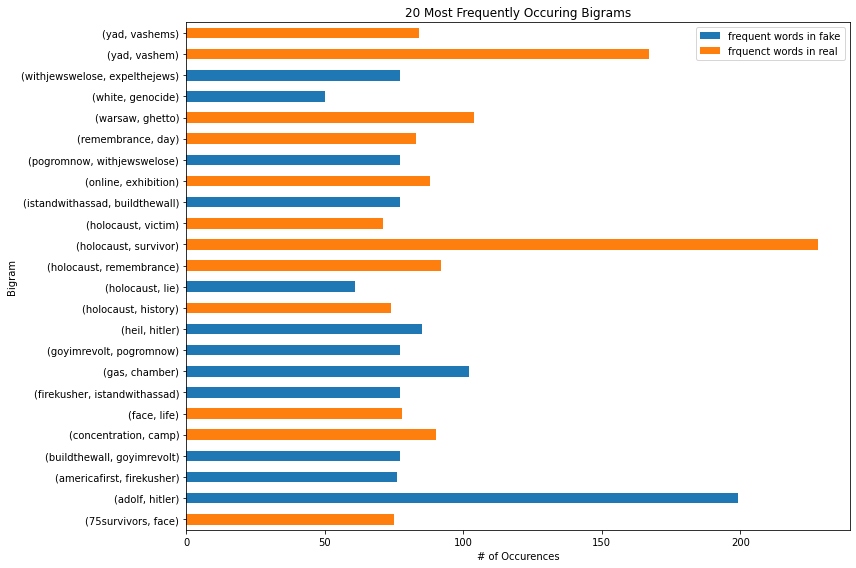

In [ ]:
fake_bigrams_series = (pd.Series(nltk.ngrams(fake_words, 2)).value_counts())[:12]
real_bigrams_series = (pd.Series(nltk.ngrams(real_words, 2)).value_counts())[:12]

trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]
fk = pd.DataFrame({'frequent words in fake':fake_bigrams_series.sort_values(), 
                   'frquenct words in real':real_bigrams_series.sort_values()})
fk.plot.barh(figsize=(12,8), stacked=True)
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurences')

In [ ]:
for x in fake_words:
  print(x)